In [1]:
from Tools import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import cantera as ct 
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:

def fit_pyoptmec(Y_t_red,Y_t_det,time_det,Y_nt_red,Y_nt_det,temp_red,temp_det,ai_det,ai_red,case) : 
    F1_m =[]
    F2_m =[]
    F3_m =[] 
    F4_m = []
    for c in range(len(case)) : 
        # Equation F1_m
        top1 = np.trapezoid(np.abs(np.array(Y_t_red[c]) - np.array(Y_t_det[c])), np.array(time_det[c]))
        bot1 = np.trapezoid(np.abs(np.array(Y_t_det[c])), np.array(time_det[c]))
        F1_m.append( (top1/bot1)**2)

        # Equation F2_m
        top2 = [(np.max(Y_nt_red[c],axis=1)[j] - np.max(Y_nt_det[c],axis=1)[j]) for j in range(len(np.max(Y_nt_det[c],axis=1))) ]
        bot2 = [np.max(Y_nt_det[c],axis=1)[j] for j in range(len(np.max(Y_nt_det[c],axis=1))) ]
    
        F2_m.append((np.array(top2)/np.array(bot2))**2)

        # Equation F3_m
        top3 = np.trapezoid(np.abs(temp_red[c] - temp_det[c]), time_det[c])
        bot3 = np.trapezoid(np.abs(temp_det[c]), time_det[c])
        F3_m .append(( top3/ bot3)**2)

        # Equation F4_m
        top4 = (ai_red[c] - ai_det[c])
        bot4= ai_det[c]
        F4_m.append((top4/bot4)**2)
        
    weight = [1,1,1,1]
    # print(f"F1 = {F1_m}")
    # print(f"F2 = {F2_m}")
    
    _err = (
                weight[0] * np.sum(F1_m)
                + weight[1] * np.sum(F2_m)
                + weight[2] * F3_m
                + weight[3] * F4_m
            )
    # print(f"Err : {_err}")

    err = np.sqrt(np.sum(_err))
    print(np.sqrt(np.sum(_err)))
    return err,F1_m,F2_m,F3_m,F4_m

In [3]:
Detailed_gas = ct.Solution("detailed.yaml")
Reduced_gas = ct.Solution("reduced.yaml")
Optim_1 = ct.Solution("STEC_A.yaml")
Optim_100 = ct.Solution("STEC_B.yaml")

Targets = ["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2']
Non_Target = ['H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]
idx_target_det = spcs_name_idx(Detailed_gas,Targets)
idx_target_red = spcs_name_idx(Reduced_gas,Targets)
idx_target_optim1 = spcs_name_idx(Optim_1,Targets)
idx_target_optim100 = spcs_name_idx(Optim_100,Targets)

idx_non_target_det = spcs_name_idx(Detailed_gas,Non_Target)
idx_non_target_red = spcs_name_idx(Reduced_gas,Non_Target)
idx_non_target_optim1 = spcs_name_idx(Optim_1,Non_Target)
idx_non_target_optim100 = spcs_name_idx(Optim_100,Non_Target)

pressure = np.linspace(1,1,1).tolist()
temperature = np.linspace(1000,2000,11).tolist()
phi = np.round(np.linspace(0.5, 2.0, 8), 1).tolist()
mixture =np.linspace(0.85,0.85,1).tolist()
case = generate_test_cases_bifuel(temperature,pressure,phi,mixture)
print(case[80])

/tmp/ipykernel_138362/3573305127.py:1: UserWarning: NasaPoly2::validate: 
For species OHV, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  Detailed_gas = ct.Solution("detailed.yaml")


(101325.0, 2000.0, 0.5, 0.85)


In [4]:
Time_det = pd.read_pickle("Time_det.pkl")
Temp_det = pd.read_pickle("Temp_det.pkl")
Y_Target_det = pd.read_pickle("Y_Target_det.pkl")
Y_Non_Target_det = pd.read_pickle("Y_Non_target_det.pkl")
AI_delay_det = pd.read_pickle("AI_det.pkl")

Time_red = pd.read_pickle("Time_red.pkl")
Temp_red = pd.read_pickle("Temp_red.pkl")
Y_Target_red = pd.read_pickle("Y_Target_red.pkl")
Y_Non_Target_red = pd.read_pickle("Y_Non_target_red.pkl")
AI_delay_red = pd.read_pickle("AI_red.pkl")

Time_red_optim1 = pd.read_pickle("Time_red_optim1.pkl")
Temp_red_optim1 = pd.read_pickle("Temp_red_optim1.pkl")
Y_Target_red_optim1 = pd.read_pickle("Y_Target_red_optim1.pkl")
Y_Non_Target_red_optim1 = pd.read_pickle("Y_Non_target_red_optim1.pkl")
AI_delay_red_optim1 = pd.read_pickle("AI_red_optim1.pkl")

Time_red_optim2 = pd.read_pickle("Time_red_optim2.pkl")
Temp_red_optim2 = pd.read_pickle("Temp_red_optim2.pkl")
Y_Target_red_optim2 = pd.read_pickle("Y_Target_red_optim2.pkl")
Y_Non_Target_red_optim2 = pd.read_pickle("Y_Non_target_red_optim2.pkl")
AI_delay_red_optim2 = pd.read_pickle("AI_red_optim2.pkl")

Err,F1,F2,F3,F4 = fit_pyoptmec(Y_Target_red,Y_Target_det,Time_det,Y_Non_Target_red,Y_Non_Target_det,Temp_red,Temp_det,AI_delay_det,AI_delay_red,case)
Err_1 ,F1_1,F2_1,F3_1,F4_1 = fit_pyoptmec(Y_Target_red_optim1,Y_Target_det,Time_det,Y_Non_Target_red_optim1,Y_Non_Target_det,Temp_red_optim1,Temp_det,AI_delay_det,AI_delay_red_optim1,case)
Err_100 ,F1_100,F2_100,F3_100,F4_100 = fit_pyoptmec(Y_Target_red_optim2,Y_Target_det,Time_det,Y_Non_Target_red_optim2,Y_Non_Target_det,Temp_red_optim2,Temp_det,AI_delay_det,AI_delay_red_optim2,case)


209436738.6417863
1885544.488061538
526.1297520446902


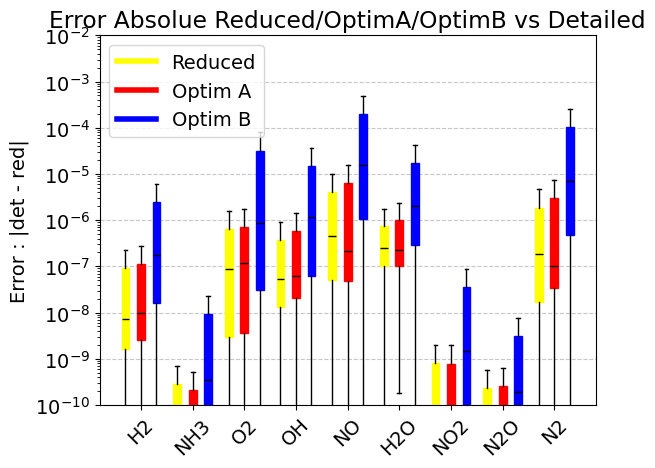

In [19]:

Y_target = np.abs(np.array(Y_Target_det) -np.array(Y_Target_red))
Y_target_optim1= np.abs(np.array(Y_Target_det) -np.array(Y_Target_red_optim1))
Y_target_optim2= np.abs(np.array(Y_Target_det) -np.array(Y_Target_red_optim2))
for spec in range(len(Targets)):
    # On récupère les erreurs pour chaque espèce et on les aplatie
    data = np.array(Y_target[:, spec, :]).flatten()
    data_optim1= np.array(Y_target_optim1[:, spec, :]).flatten()
    data_optim2= np.array(Y_target_optim2[:, spec, :]).flatten()
    
    # Création du box plot pour l'espèce spécifiée
    plt.boxplot(data, positions=[spec + 1 -0.3], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='yellow', color='yellow'),
                medianprops=dict(color='black'))
    
    plt.boxplot(data_optim1, positions=[spec + 1], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='red', color='red'),
                medianprops=dict(color='black'))
    plt.boxplot(data_optim2, positions=[spec + 1+0.3], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='blue'),
                medianprops=dict(color='black'))
legend_elements = [
    
    Line2D([0], [0], color='yellow', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
# Configuration de l'axe X avec les noms des espèces
plt.xticks(ticks=range(1, 10), labels=Targets, rotation=45)
plt.ylabel("Error : |det - red|")
plt.title("Error Absolue Reduced/OptimA/OptimB vs Detailed")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale("log")
plt.ylim([1e-10,1e-2])
# Affichage du graphique
plt.savefig("Target_Giovanni_ErrABS.png")
plt.show()

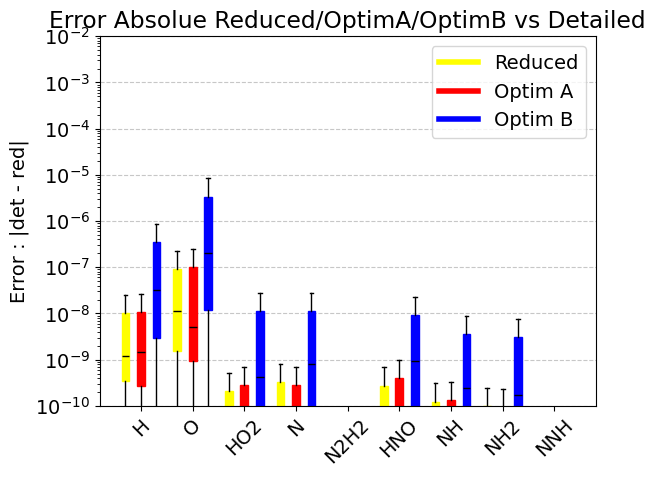

In [20]:
Y_non_target = np.abs(np.array(Y_Non_Target_red) -np.array(Y_Non_Target_det))
Y_non_target_optim1 = np.abs(np.array(Y_Non_Target_red) -np.array(Y_Non_Target_red_optim1))
Y_non_target_optim2 = np.abs(np.array(Y_Non_Target_red) -np.array(Y_Non_Target_red_optim2))

for spec in range(len(Non_Target)):
    # On récupère les erreurs pour chaque espèce et on les aplatie
    data = np.array(Y_non_target[:, spec, :]).flatten()
    data_optim1= np.array(Y_non_target_optim1[:, spec, :]).flatten()
    data_optim2= np.array(Y_non_target_optim2[:, spec, :]).flatten()
    
    # Création du box plot pour l'espèce spécifiée
    plt.boxplot(data, positions=[spec + 1-0.3], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='yellow', color='yellow'),
                medianprops=dict(color='black'))
    plt.boxplot(data_optim1, positions=[spec + 1], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='red', color='red'),
                medianprops=dict(color='black'))
    plt.boxplot(data_optim2, positions=[spec + 1+0.3], showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='blue'),
                medianprops=dict(color='black'))
legend_elements = [
    
    Line2D([0], [0], color='yellow', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
# Configuration de l'axe X avec les noms des espèces
plt.xticks(ticks=range(1, 10), labels=Non_Target, rotation=45)
plt.ylabel("Error : |det - red|")
plt.title("Error Absolue Reduced/OptimA/OptimB vs Detailed")
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Affichage du graphique
plt.yscale("log")
plt.ylim([1e-10,1e-2])
plt.savefig("Non_Target_Giovanni_ErrABS.png")
plt.show()

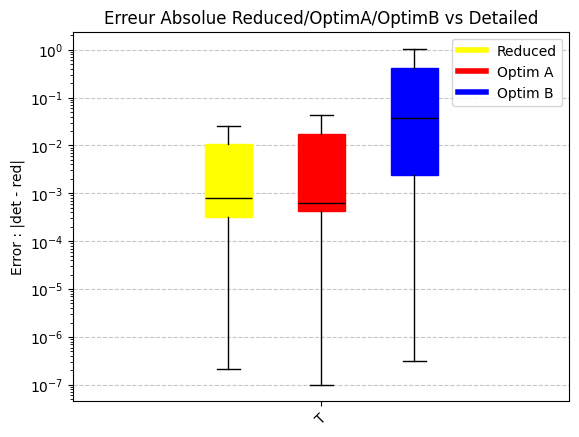

In [7]:
Temp = np.abs(np.array(Temp_det) - np.array(Temp_red))
Temp_optim1 = np.abs(np.array(Temp_det) - np.array(Temp_red_optim1))
Temp_optim2 = np.abs(np.array(Temp_det) - np.array(Temp_red_optim2))


# Création des box plots avec des positions décalées pour éviter les chevauchements
plt.boxplot(Temp.flatten(),positions=[1-0.3], showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='yellow', color='yellow'),
            medianprops=dict(color='black'))


plt.boxplot(Temp_optim1.flatten(),positions=[1], showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='red', color='red'),
            medianprops=dict(color='black'))

plt.boxplot(Temp_optim2.flatten(),positions=[1+0.3], showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            medianprops=dict(color='black'))
legend_elements = [
    
    Line2D([0], [0], color='yellow', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
# Configuration de l'axe X
plt.xticks(ticks=[1], labels=['T'], rotation=45)
plt.ylabel("Error : |det - red|")
plt.title("Erreur Absolue Reduced/OptimA/OptimB vs Detailed")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale("log")
plt.savefig("Temperature_Giovanni_ErrABS.png")
# Affichage du graphique
plt.show()

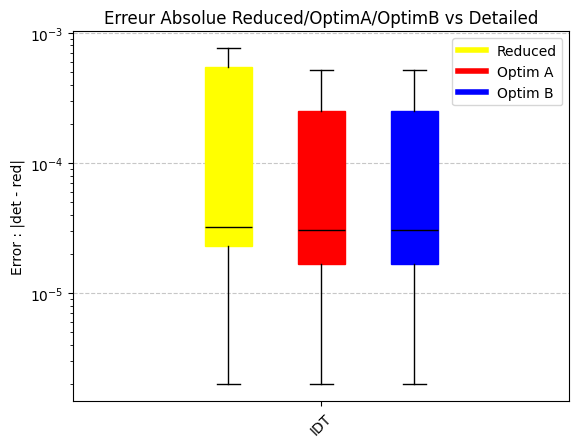

In [8]:
AI = np.abs(np.array(AI_delay_det) - np.array(AI_delay_red))
AI_optim1 = np.abs(np.array(AI_delay_det) - np.array(AI_delay_red_optim1))
AI_optim2 = np.abs(np.array(AI_delay_det) - np.array(AI_delay_red_optim1))


# Création des box plots avec des positions décalées pour éviter les chevauchements
plt.boxplot(AI.flatten(),positions=[1-0.3], showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='yellow', color='yellow'),
            medianprops=dict(color='black'))


plt.boxplot(AI_optim1.flatten(),positions=[1], showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='red', color='red'),
            medianprops=dict(color='black'))

plt.boxplot(AI_optim2.flatten(),positions=[1+0.3], showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            medianprops=dict(color='black'))
legend_elements = [
    
    Line2D([0], [0], color='yellow', lw=4, label='Reduced'),
    Line2D([0], [0], color='red', lw=4, label='Optim A'),
    Line2D([0], [0], color='blue', lw=4, label='Optim B')
] 
plt.legend(handles=legend_elements)
# Configuration de l'axe X
plt.xticks(ticks=[1], labels=['IDT'], rotation=45)
plt.ylabel("Error : |det - red|")
plt.title("Erreur Absolue Reduced/OptimA/OptimB vs Detailed")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale("log")
plt.savefig("IDT_Giovanni_ErrABS.png")
# Affichage du graphique
plt.show()

In [9]:
print(case[0])
ind_05 = [i for i, (_, _, phi, _) in enumerate(case) if phi == 0.5]
ind_1 = [i for i, (_, _, phi, _) in enumerate(case) if phi == 1.1]
ind_15=[i for i, (_, _, phi, _) in enumerate(case) if phi == 1.6]
ind_2 = [i for i, (_, _, phi, _) in enumerate(case) if phi == 2.0]
print(ind_05)
print(ind_1)
print(ind_2)

(101325.0, 1000.0, 0.5, 0.85)
[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]
[3, 11, 19, 27, 35, 43, 51, 59, 67, 75, 83]
[7, 15, 23, 31, 39, 47, 55, 63, 71, 79, 87]


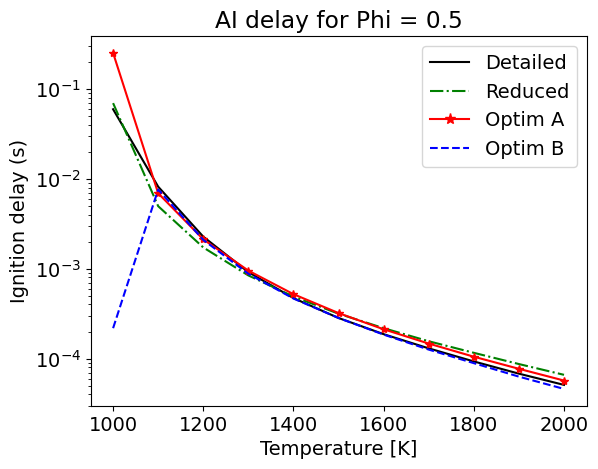

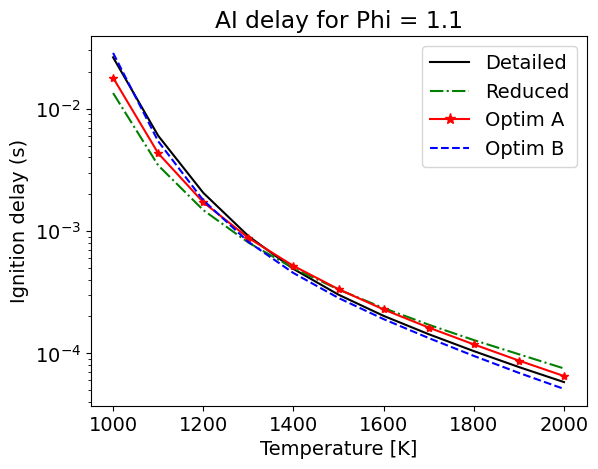

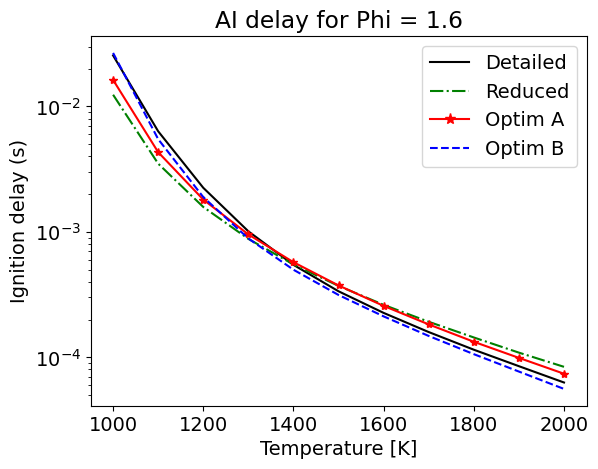

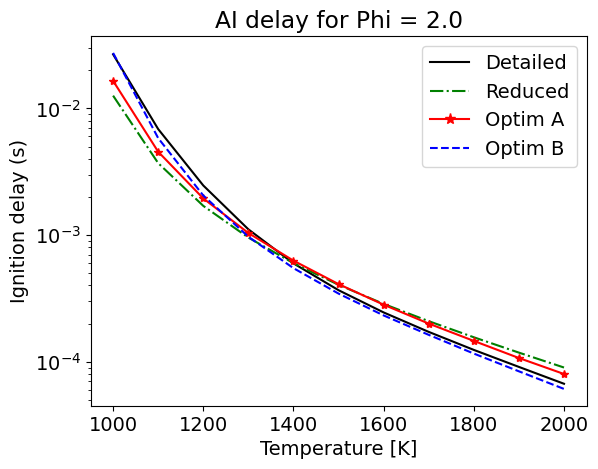

In [10]:
plt.rcParams.update({'font.size': 14}) 
plt.figure()

# Extraire les valeurs X et Y pour chaque courbe
x_values = [case[i][1] for i in ind_05]  # Température
y_det = [AI_delay_det[i] for i in ind_05]
y_red = [AI_delay_red[i] for i in ind_05]
y_red_optim1 = [AI_delay_red_optim1[i] for i in ind_05]
y_red_optim2 = [AI_delay_red_optim2[i] for i in ind_05]

# Tracer les courbes avec lignes et marqueurs
plt.plot(x_values, y_det, linestyle="-", color="black", label="Detailed")
plt.plot(x_values, y_red, linestyle="-.", color="green", label="Reduced")
plt.plot(x_values, y_red_optim1,marker ='*', linestyle="-", color="red", label="Optim A")
plt.plot(x_values, y_red_optim2, linestyle="--", color="blue", label="Optim B")

# Échelle logarithmique en Y
plt.yscale("log")

# Légende avec marqueurs
legend_elements = [
    Line2D([0], [0], linestyle="-", color='black', markersize=8, label='Detailed'),
    Line2D([0], [0], linestyle="-.", color='green', markersize=10, label='Reduced'),
    Line2D([0], [0], marker = "*",linestyle="-", color='red', markersize=8, label='Optim A'),
    Line2D([0], [0], linestyle="--", color='blue', markersize=8, label='Optim B')
] 

plt.legend(handles=legend_elements)
plt.title("AI delay for Phi = 0.5")
plt.xlabel("Temperature [K]")
plt.ylabel("Ignition delay (s)")
plt.savefig("Ai_delay_NH30.85,ER_0.50.png")
plt.figure()

# Extraire les valeurs X et Y pour chaque courbe
x_values = [case[i][1] for i in ind_1]  # Température
y_det = [AI_delay_det[i] for i in ind_1]
y_red = [AI_delay_red[i] for i in ind_1]
y_red_optim1 = [AI_delay_red_optim1[i] for i in ind_1]
y_red_optim2 = [AI_delay_red_optim2[i] for i in ind_1]

# Tracer les courbes avec lignes et marqueurs
plt.plot(x_values, y_det, linestyle="-", color="black", label="Detailed")
plt.plot(x_values, y_red, linestyle="-.", color="green", label="Reduced")
plt.plot(x_values, y_red_optim1,marker ='*', linestyle="-", color="red", label="Optim A")
plt.plot(x_values, y_red_optim2, linestyle="--", color="blue", label="Optim B")

# Échelle logarithmique en Y
plt.yscale("log")

# Légende avec marqueurs
legend_elements = [
    Line2D([0], [0], linestyle="-", color='black', markersize=8, label='Detailed'),
    Line2D([0], [0], linestyle="-.", color='green', markersize=10, label='Reduced'),
    Line2D([0], [0], marker = "*",linestyle="-", color='red', markersize=8, label='Optim A'),
    Line2D([0], [0], linestyle="--", color='blue', markersize=8, label='Optim B')
] 

plt.legend(handles=legend_elements)
plt.title("AI delay for Phi = 1.1")
plt.xlabel("Temperature [K]")
plt.ylabel("Ignition delay (s)")
plt.savefig("Ai_delay_NH30.85,ER_1.00.png")
plt.show()


plt.figure()

# Extraire les valeurs X et Y pour chaque courbe
x_values = [case[i][1] for i in ind_15]  # Température
y_det = [AI_delay_det[i] for i in ind_15]
y_red = [AI_delay_red[i] for i in ind_15]
y_red_optim1 = [AI_delay_red_optim1[i] for i in ind_15]
y_red_optim2 = [AI_delay_red_optim2[i] for i in ind_15]

# Tracer les courbes avec lignes et marqueurs
plt.plot(x_values, y_det, linestyle="-", color="black", label="Detailed")
plt.plot(x_values, y_red, linestyle="-.", color="green", label="Reduced")
plt.plot(x_values, y_red_optim1,marker ='*', linestyle="-", color="red", label="Optim A")
plt.plot(x_values, y_red_optim2, linestyle="--", color="blue", label="Optim B")

# Échelle logarithmique en Y
plt.yscale("log")

# Légende avec marqueurs
legend_elements = [
    Line2D([0], [0], linestyle="-", color='black', markersize=8, label='Detailed'),
    Line2D([0], [0], linestyle="-.", color='green', markersize=10, label='Reduced'),
    Line2D([0], [0], marker = "*",linestyle="-", color='red', markersize=8, label='Optim A'),
    Line2D([0], [0], linestyle="--", color='blue', markersize=8, label='Optim B')
] 

plt.legend(handles=legend_elements)
plt.title("AI delay for Phi = 1.6")
plt.xlabel("Temperature [K]")
plt.ylabel("Ignition delay (s)")
plt.savefig("Ai_delay_NH30.85,ER_1.50.png")
plt.show()


plt.figure()

# Extraire les valeurs X et Y pour chaque courbe
x_values = [case[i][1] for i in ind_2]  # Température
y_det = [AI_delay_det[i] for i in ind_2]
y_red = [AI_delay_red[i] for i in ind_2]
y_red_optim1 = [AI_delay_red_optim1[i] for i in ind_2]
y_red_optim2 = [AI_delay_red_optim2[i] for i in ind_2]

# Tracer les courbes avec lignes et marqueurs
plt.plot(x_values, y_det, linestyle="-", color="black", label="Detailed")
plt.plot(x_values, y_red, linestyle="-.", color="green", label="Reduced")
plt.plot(x_values, y_red_optim1,marker ='*', linestyle="-", color="red", label="Optim A")
plt.plot(x_values, y_red_optim2, linestyle="--", color="blue", label="Optim B")

# Échelle logarithmique en Y
plt.yscale("log")

# Légende avec marqueurs
legend_elements = [
    Line2D([0], [0], linestyle="-", color='black', markersize=8, label='Detailed'),
    Line2D([0], [0], linestyle="-.", color='green', markersize=10, label='Reduced'),
    Line2D([0], [0], marker = "*",linestyle="-", color='red', markersize=8, label='Optim A'),
    Line2D([0], [0], linestyle="--", color='blue', markersize=8, label='Optim B')
] 

plt.legend(handles=legend_elements)
plt.title("AI delay for Phi = 2.0")
plt.xlabel("Temperature [K]")
plt.ylabel("Ignition delay (s)")
plt.savefig("Ai_delay_NH30.85,ER_2.00.png")
plt.show()





In [11]:
y_det = [AI_delay_det[i] for i in ind_1]
y_det1 = [AI_delay_det[i] for i in ind_2]
print(y_det)
print(y_det1)

[0.026375000000005724, 0.006020000000000475, 0.002052999999999948, 0.0009090000000000156, 0.0004890000000000054, 0.0003010000000000008, 0.00020199999999999954, 0.0001429999999999997, 0.0001039999999999998, 7.699999999999988e-05, 5.799999999999993e-05]
[0.026709000000006058, 0.006865000000000587, 0.0024630000000000025, 0.001110000000000006, 0.000598000000000008, 0.0003670000000000024, 0.00024499999999999945, 0.00017199999999999963, 0.00012399999999999976, 9.099999999999984e-05, 6.699999999999991e-05]


(101325.0, 2000.0, 0.5, 0.85)
9


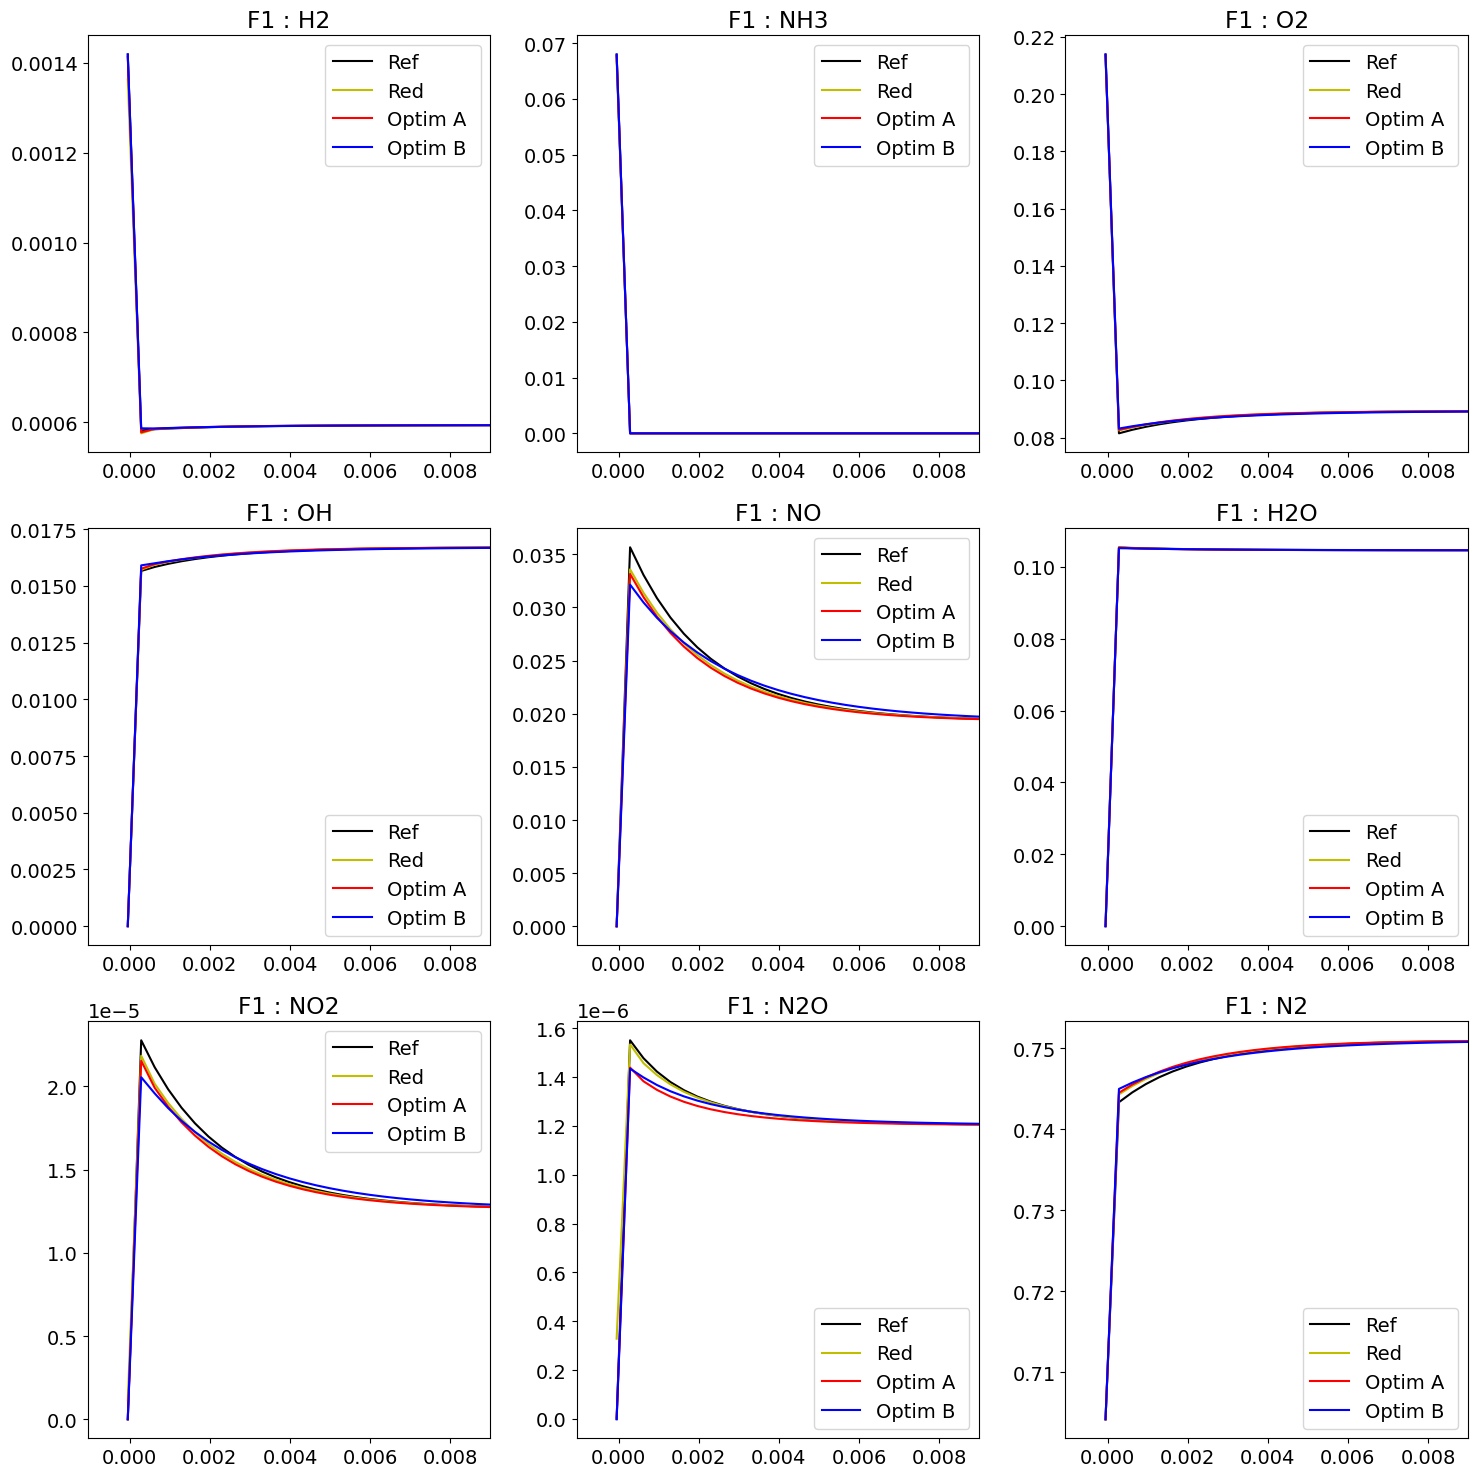

9


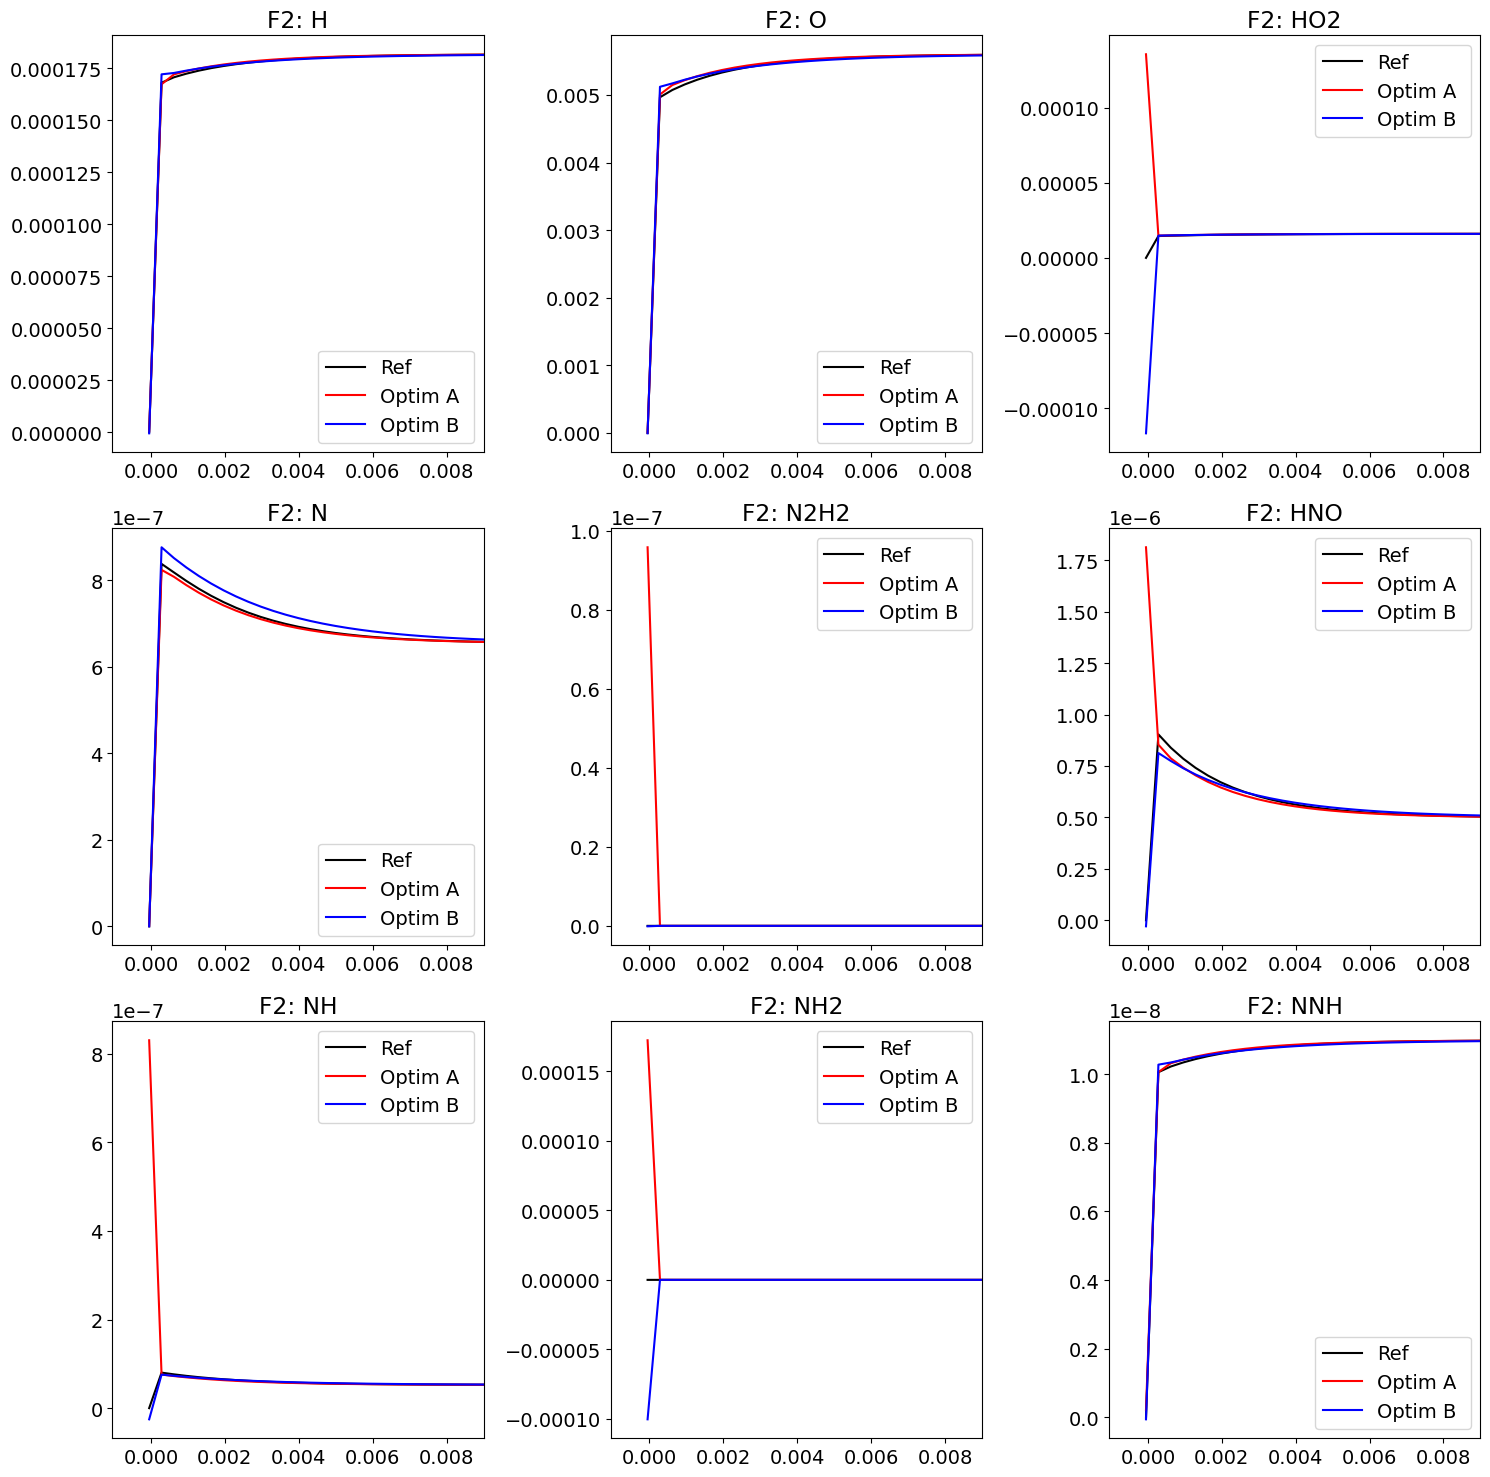

In [12]:

case_ind = 80
print(case[case_ind])

# Nombre de sous-graphiques (subplots)
n = len(Targets)
print(n)
cols = 3  # Nombre de colonnes de subplots
rows = (n // cols) + (n % cols > 0)  # Nombre de lignes, arrondi vers le haut

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Taille ajustable
axes = axes.flatten()  # Transformer la matrice d'axes en liste pour faciliter l'indexation

for i in range(n):
    ax = axes[i]
    ax.plot(Time_det[case_ind], Y_Target_det[case_ind][i], 'k', label="Ref")
    ax.plot(Time_det[case_ind], Y_Target_red[case_ind][i],'y', label="Red")
    ax.plot(Time_det[case_ind], Y_Target_red_optim1[case_ind][i],'r', label="Optim A ")
    ax.plot(Time_det[case_ind], Y_Target_red_optim2[case_ind][i],'b', label="Optim B ")
    ax.set_xlim([np.min(Time_det[case_ind]-0.001), 0.009])
    ax.set_title(f"F1 : {Targets[i]}")
    ax.legend()

# Supprimer les subplots vides si len(Targets) < rows * cols
for i in range(n, rows * cols):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.savefig("Target_single_case.png")
plt.show()

# Nombre de sous-graphiques (subplots)
n = len(Non_Target)
print(n)
cols = 3  # Nombre de colonnes de subplots
rows = (n // cols) + (n % cols > 0)  # Nombre de lignes, arrondi vers le haut

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Taille ajustable
axes = axes.flatten()  # Transformer la matrice d'axes en liste pour faciliter l'indexation

for i in range(n):
    ax = axes[i]
    ax.plot(Time_det[case_ind], Y_Non_Target_det[case_ind][i], 'k', label="Ref")
    # ax.plot(Time_det[case_ind], Y_Non_Target_red[case_ind][i],'y', label="Red")
    ax.plot(Time_det[case_ind], Y_Non_Target_red_optim1[case_ind][i],'r', label="Optim A ")
    ax.plot(Time_det[case_ind], Y_Non_Target_red_optim2[case_ind][i],'b', label="Optim B ")
    ax.set_xlim([np.min(Time_det[case_ind])-0.001, 0.009])
    ax.set_title(f"F2: {Non_Target[i]}")
    ax.legend()

# Supprimer les subplots vides si len(Targets) < rows * cols
for i in range(n, rows * cols):
    fig.delaxes(axes[i])

plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.savefig("Non_Target_single_case.png")
plt.show()


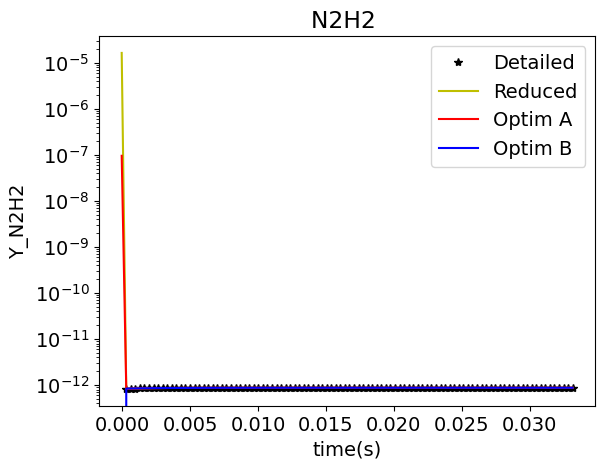

In [13]:
case_ind = 80
plt.plot(Time_det[case_ind],Y_Non_Target_det[case_ind][4],'k*',label="Detailed")
plt.plot(Time_det[case_ind],Y_Non_Target_red[case_ind][4],'y',label="Reduced")
plt.plot(Time_det[case_ind],Y_Non_Target_red_optim1[case_ind][4],'r',label="Optim A")
plt.plot(Time_det[case_ind],Y_Non_Target_red_optim2[case_ind][4],'b',label="Optim B")
plt.yscale("log")
plt.legend()
plt.title("N2H2 ")
plt.ylabel("Y_N2H2")
plt.xlabel("time(s)")
plt.savefig("N2H2_temporal.png")